In [30]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [14]:
funda_data = pd.read_csv('Fundamental_data.csv')
funda_data = funda_data.drop(columns=['public_date',"pcf",'staff_sale','PEG_trailing','gvkey','permno','adate'])
funda_data = funda_data.drop_duplicates()
stock_list = ['AAPL','AMZN','BRK-B','GOOG','JNJ','META','MSFT','NVDA','TSLA','V']

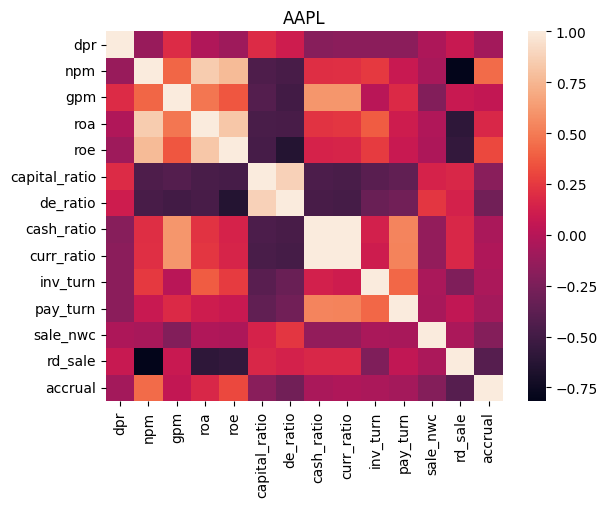

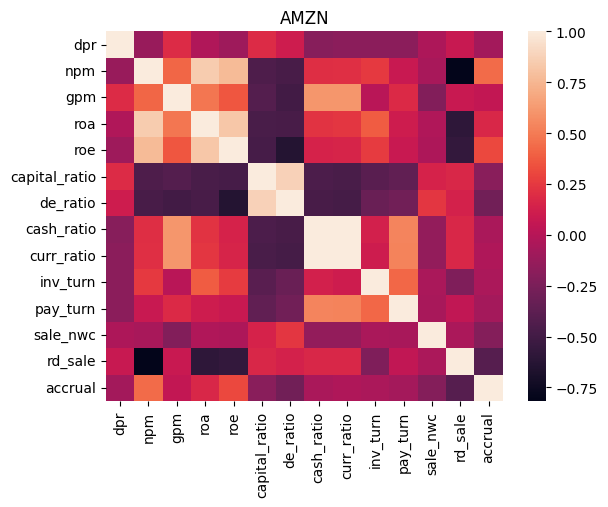

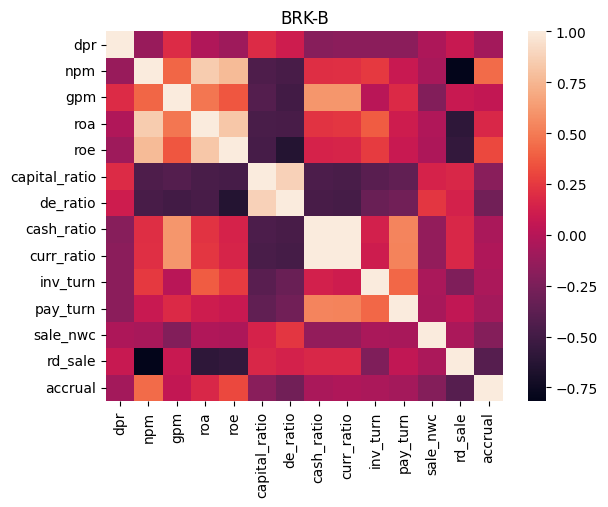

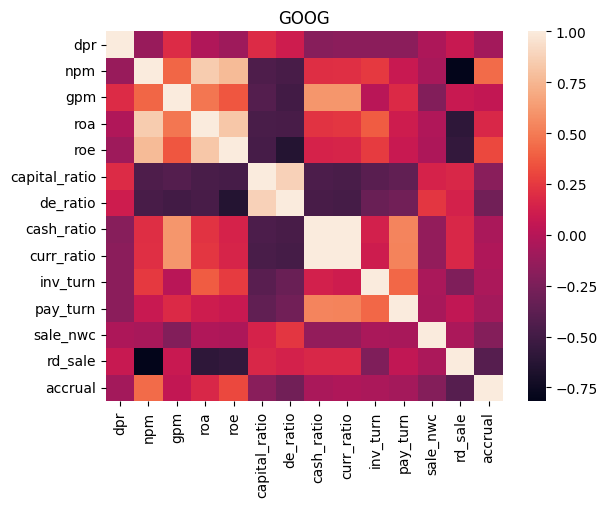

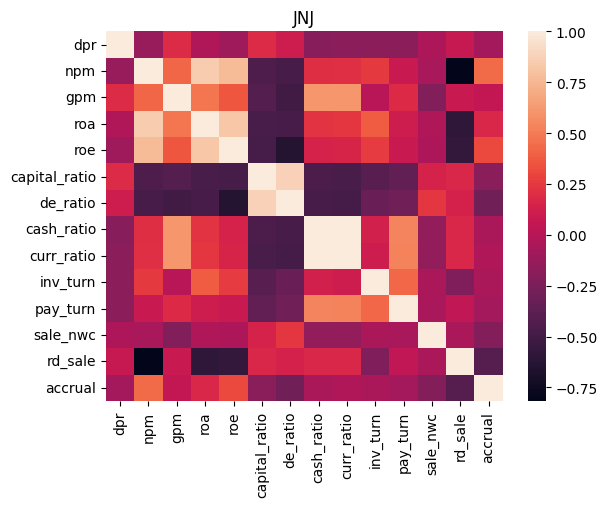

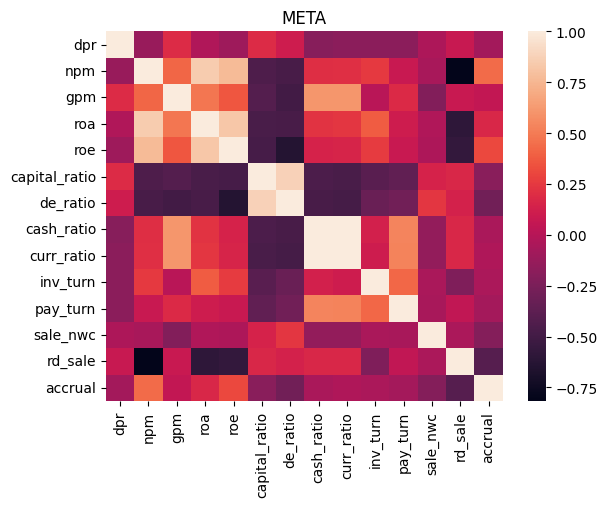

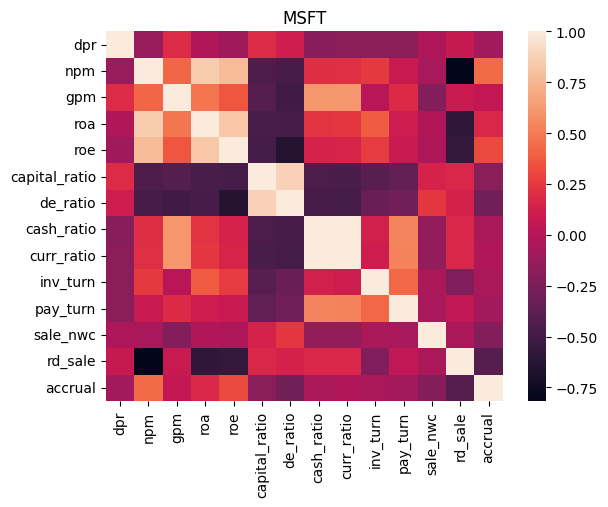

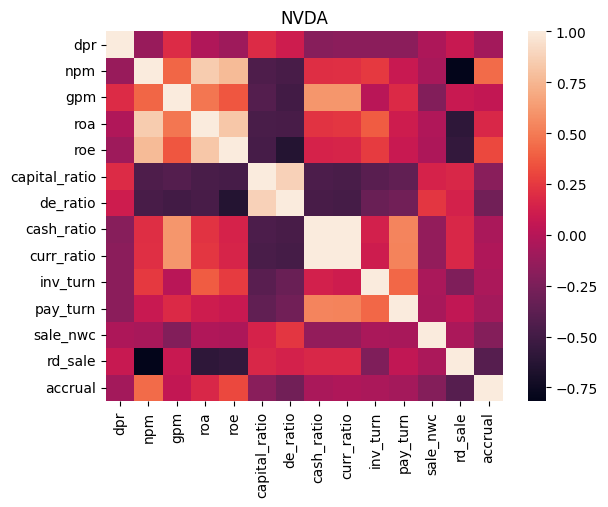

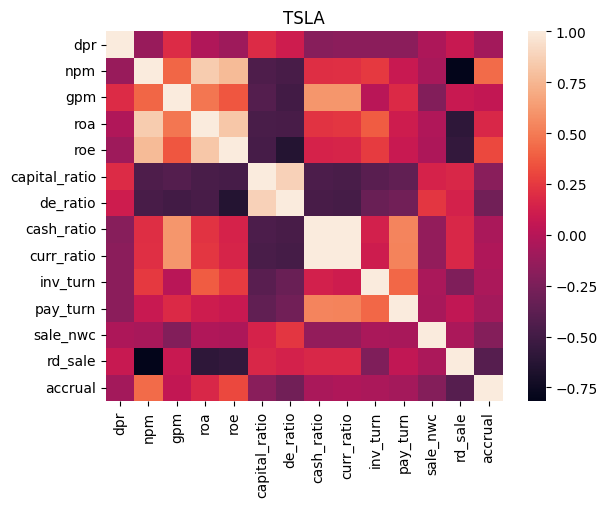

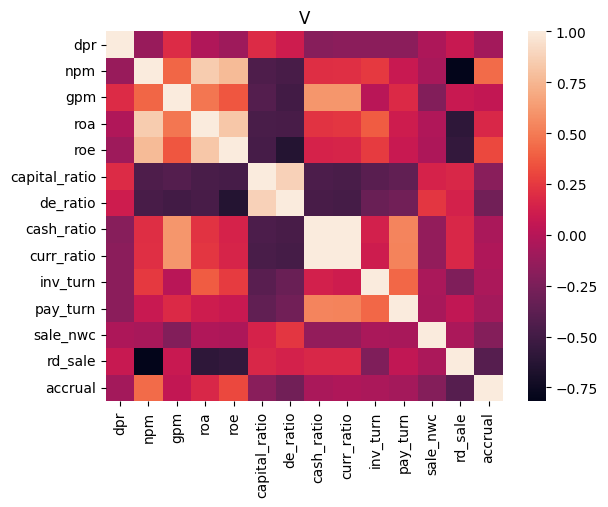

In [44]:
for s in stock_list:
    funda_stock = funda_data.loc[funda_data.TICKER == s,:]
    funda_stock['qdate'] = funda_data.qdate.apply(lambda x:dt.datetime.strptime(x,'%m/%d/%Y'))
    funda_stock.set_index('qdate')
    sns.heatmap(funda_data.corr().fillna(0))
    plt.title(s)
    plt.show()

In [7]:
def merge_left(funda_stock,name,freq):
    price = pd.read_csv('../stock_price/'+freq+'/'+name+'.csv')
    price['Date'] = price.Date.apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
    close = price.loc[:,['Date']]
    df = pd.merge(funda_stock,close,how='right',left_on=['qdate'],right_on=['Date'])
# Here we merge the dataset together using the forward filling method, which is using the old time data to fill the later time.
    df.fillna(method='ffill',inplace=True)
    df.set_index('Date',inplace=True)
    df.drop(columns=['qdate','TICKER'],inplace=True)
    df.dropna(inplace=True,how='all')
    df.to_csv('FundaIndicators/'+freq+'/'+name+'.csv')

In [9]:
for name in pd.unique(funda_data.TICKER).tolist():
    funda_stock = funda_data.loc[funda_data.TICKER==name,:]
    funda_stock['qdate'] = funda_data.qdate.apply(lambda x:dt.datetime.strptime(x,'%m/%d/%Y'))
    if name == 'FB':
        name = 'META'
    elif name == 'BRK':
        name = 'BRK-B'
    elif name == 'GOOGL':
        name = 'GOOG'
    merge_left(funda_stock,name,'Daily')
    merge_left(funda_stock,name,'Weekly')
    merge_left(funda_stock,name,'Monthly')

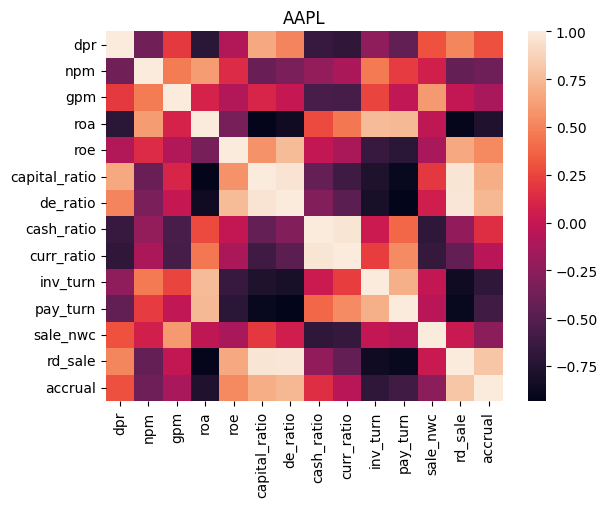

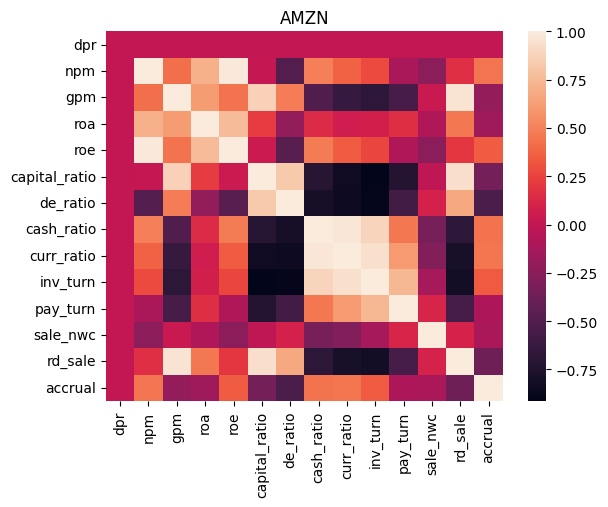

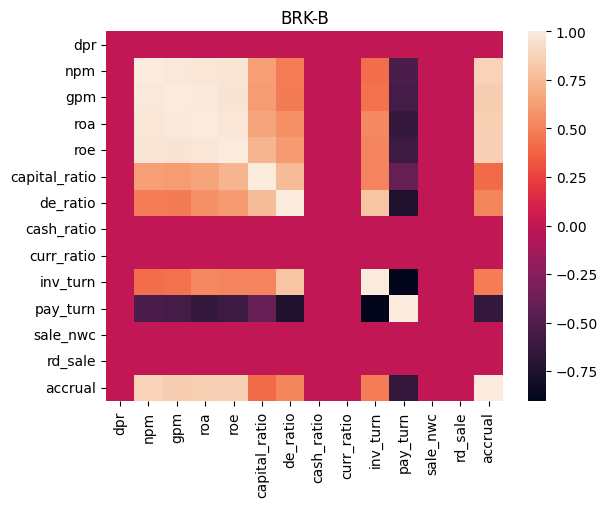

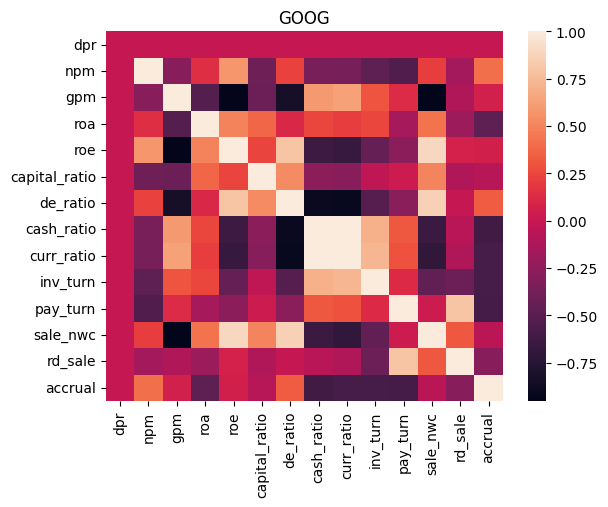

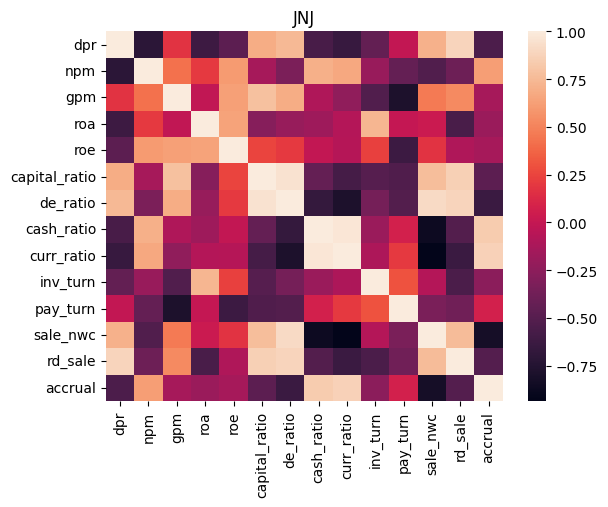

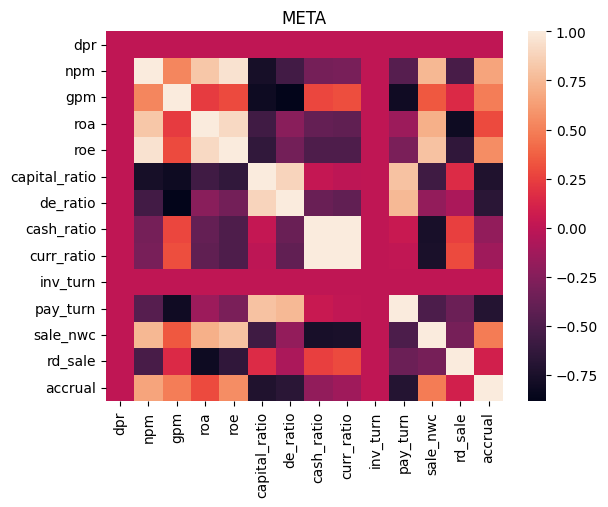

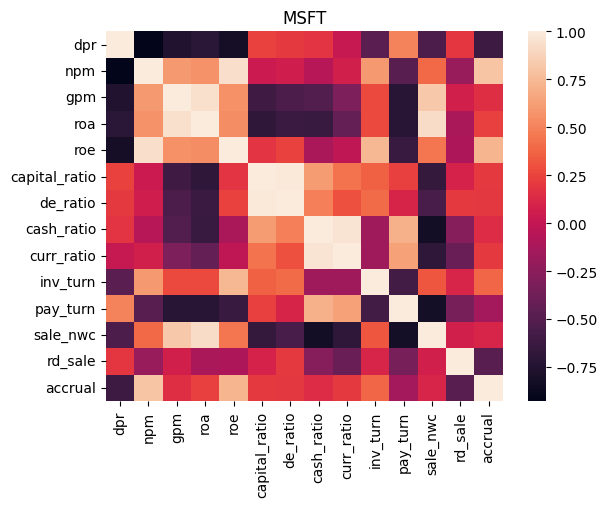

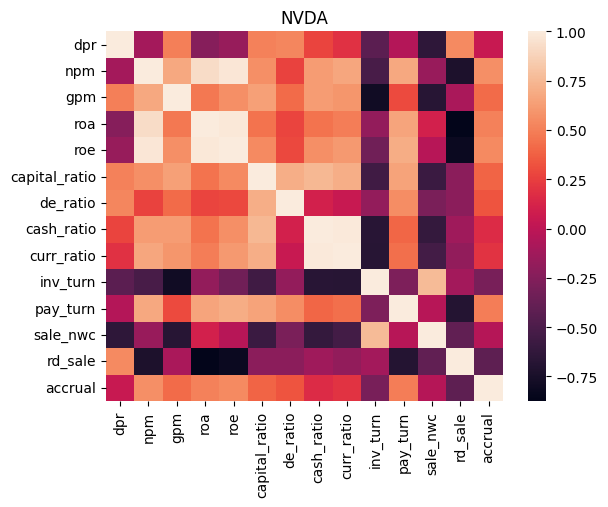

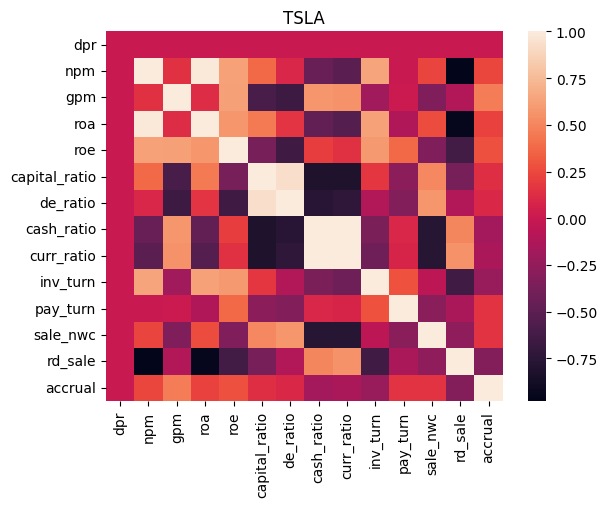

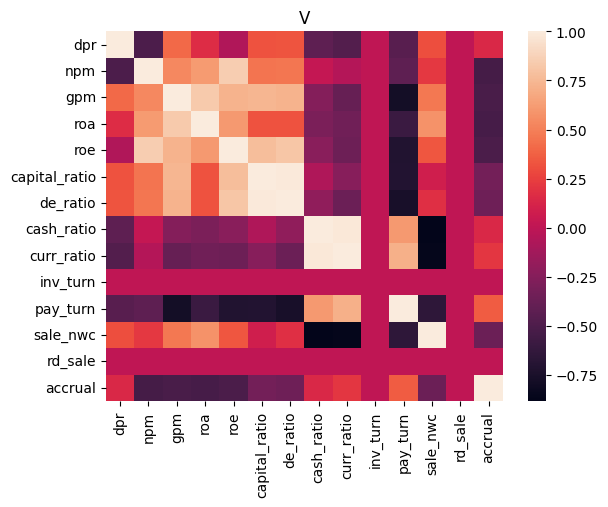

In [39]:
freq = 'Daily'

for name in stock_list:
    FundaInd = pd.read_csv('FundaIndicators/'+freq+'/'+name+'.csv')
    sns.heatmap(FundaInd.corr().fillna(0))
    plt.title(name)
    plt.show()

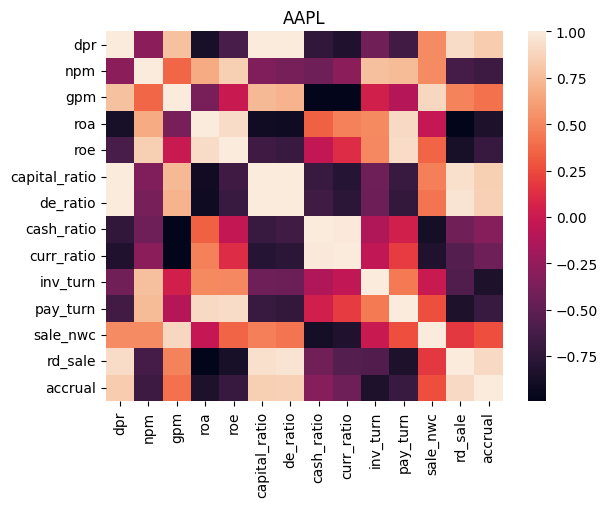

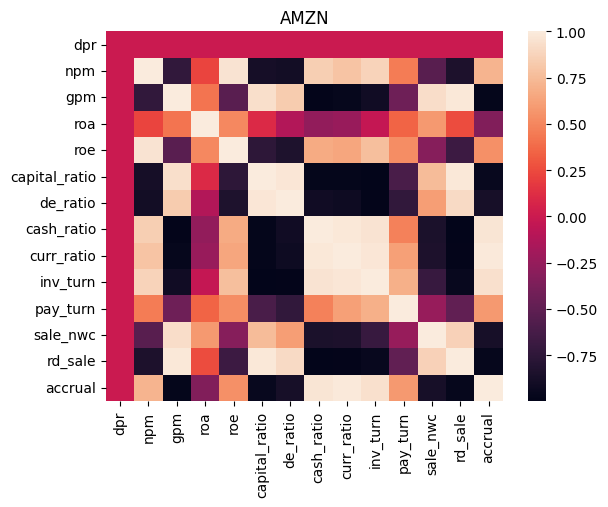

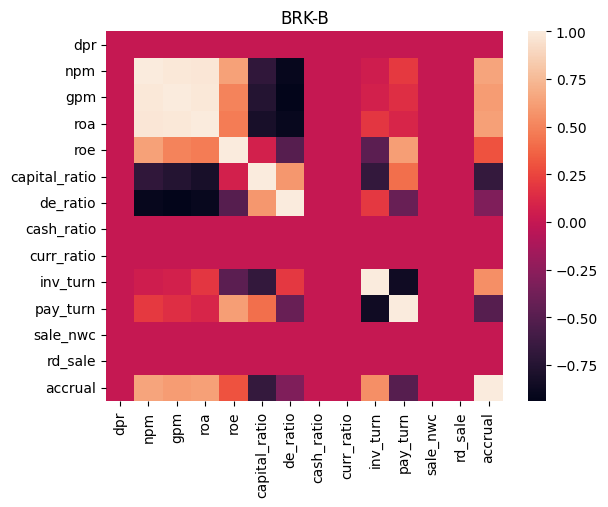

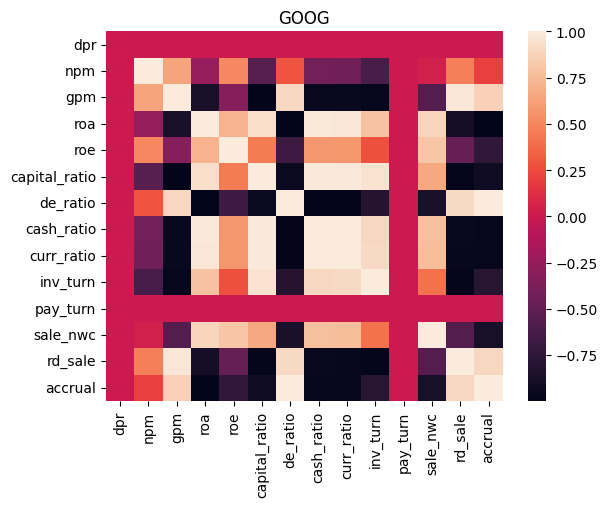

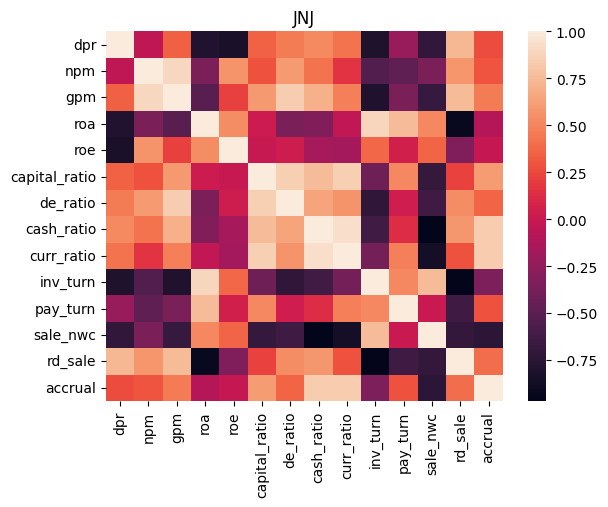

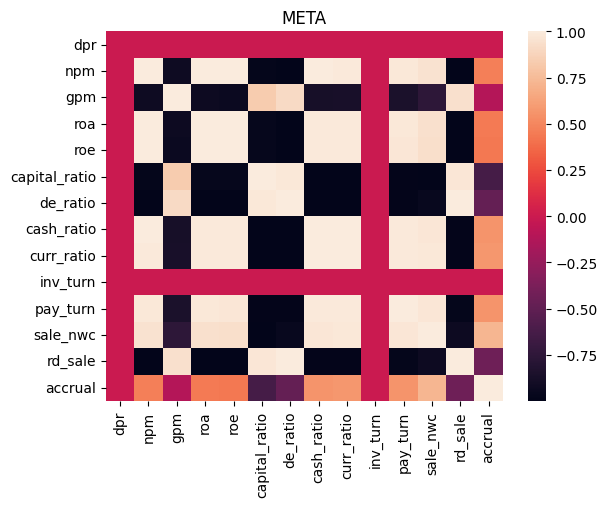

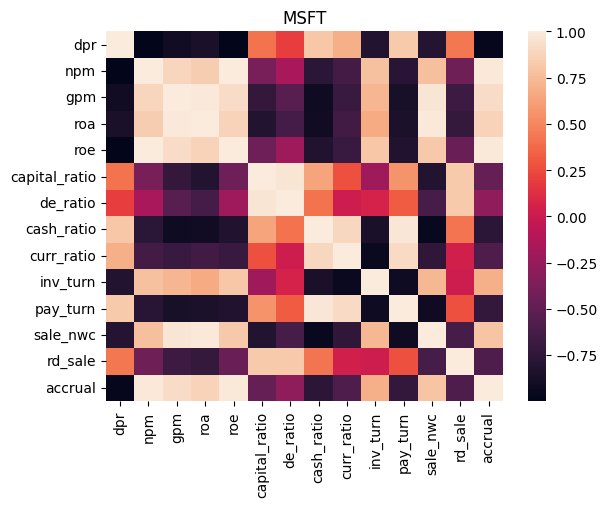

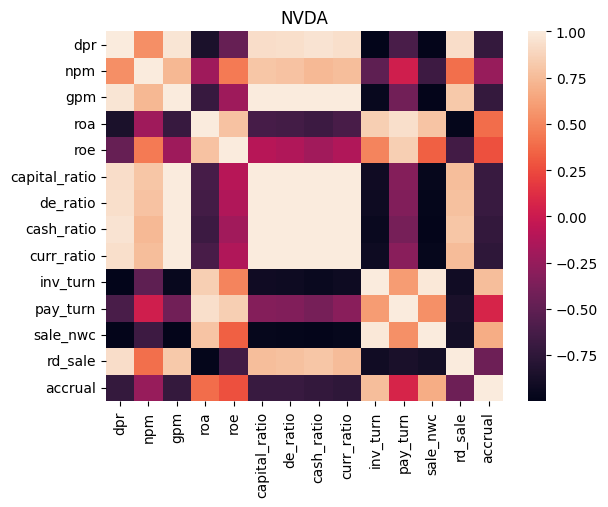

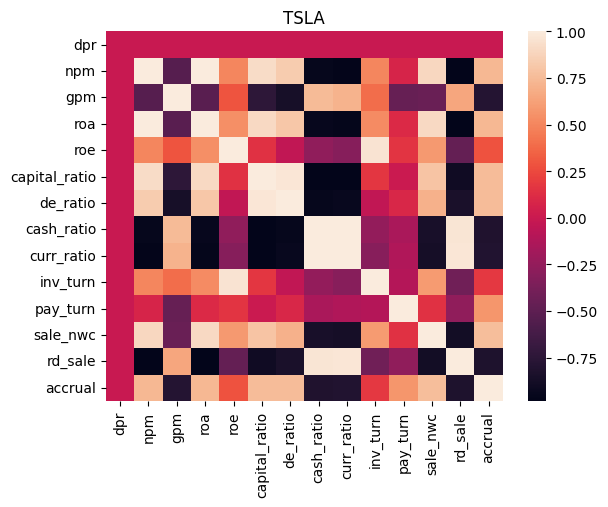

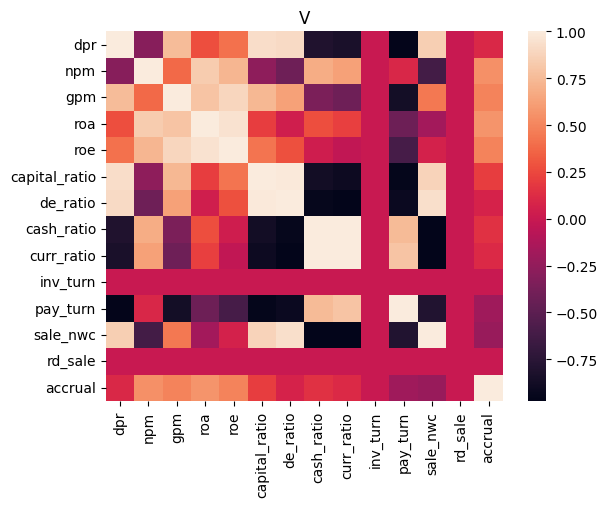

In [40]:
freq = 'Weekly'

for name in stock_list:
    FundaInd = pd.read_csv('FundaIndicators/'+freq+'/'+name+'.csv')
    sns.heatmap(FundaInd.corr().fillna(0))
    plt.title(name)
    plt.show()



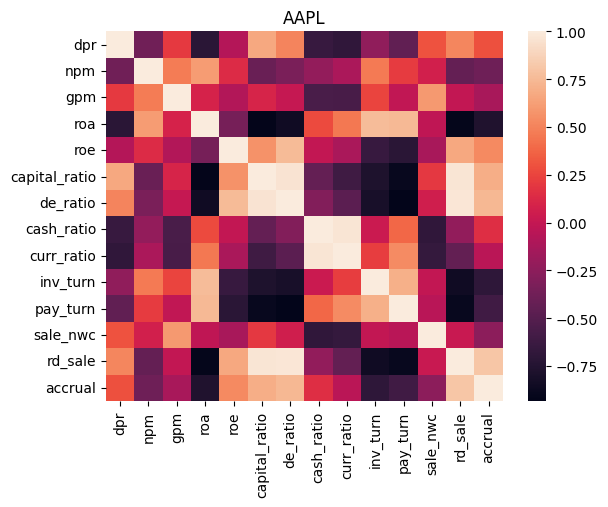

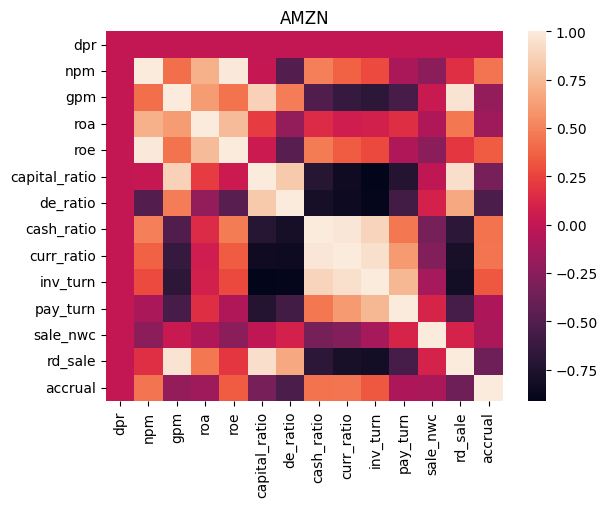

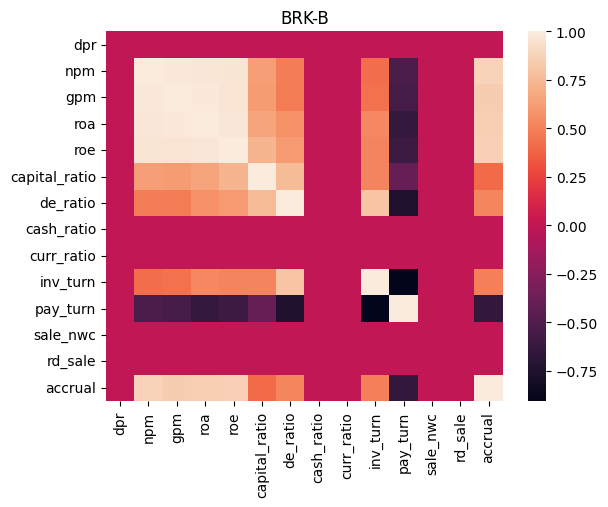

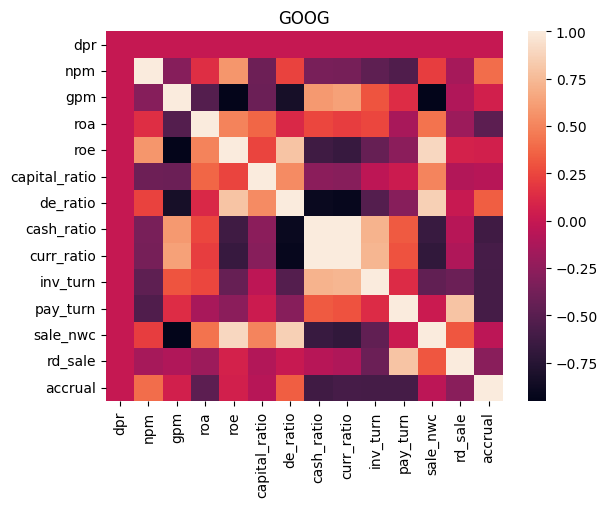

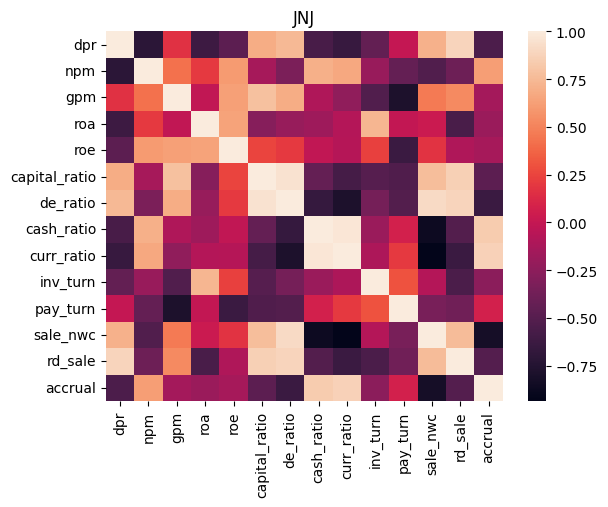

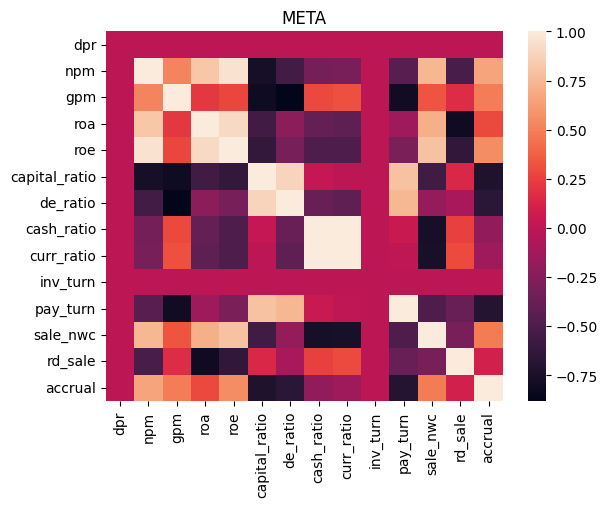

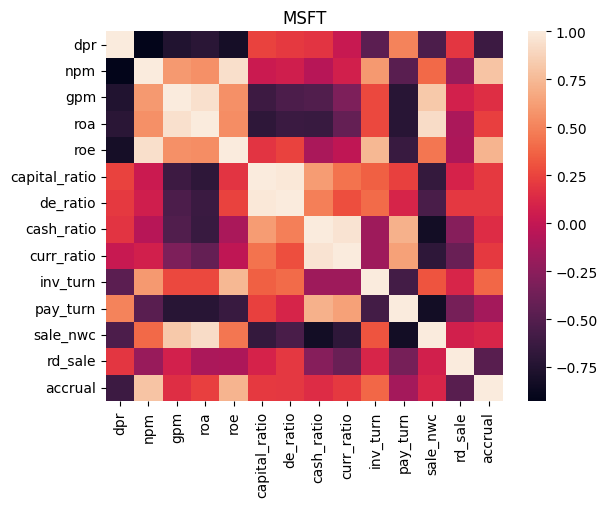

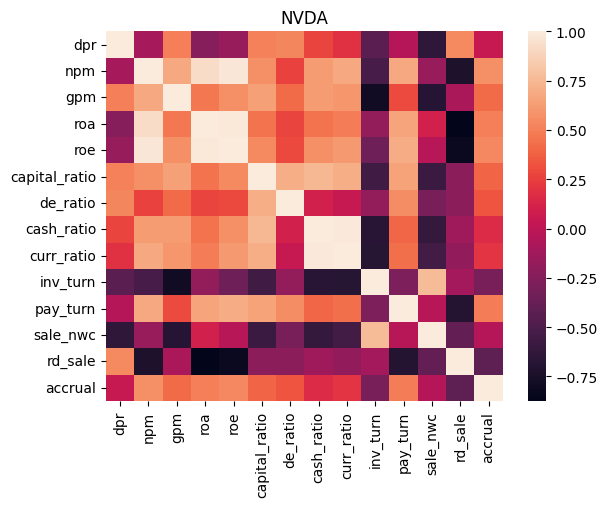

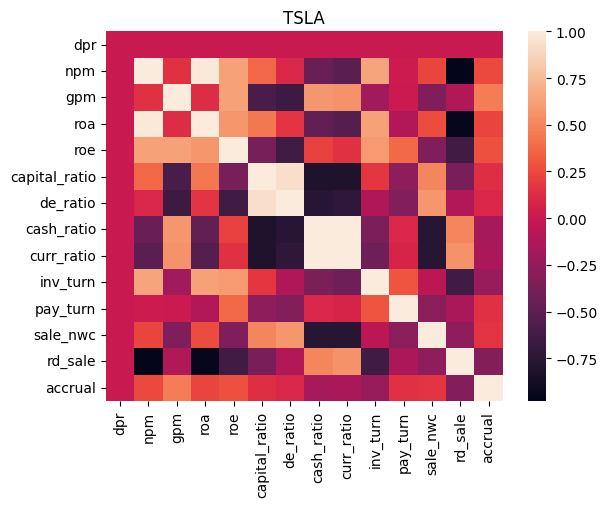

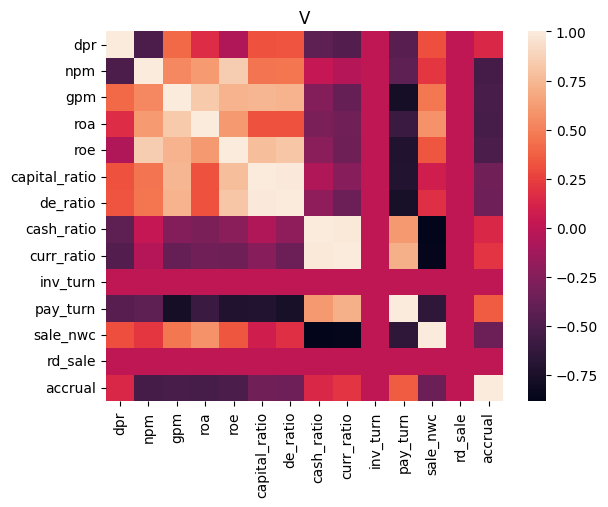

In [42]:
freq = 'Monthly'

for name in stock_list:
    FundaInd = pd.read_csv('FundaIndicators/'+freq+'/'+name+'.csv')
    sns.heatmap(FundaInd.corr().fillna(0))
    plt.title(name)
    plt.show()